## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 各隊薪資佔聯盟總薪資的佔比
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係
* 薪資組合和戰績的關係


### 首先先匯入會用到的函式庫

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
data <- read.csv("各年度各隊薪資\\2018.csv")
head(data)

Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


In [4]:
salList <- list()
for (i in c(2011:2018))
{
    salList[[i - 2010]] <- read.csv(paste("各年度各隊薪資\\", toString(i), ".csv", sep=""))
}

standingList <- list()
for (i in c(2011:2018))
{
    standingList[[i - 2010]] <- read.csv(paste("各年度戰績\\", toString(i), ".csv", sep=""))
}
head(standingList[[1]])

Name,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF,STRK,L10
<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
Philadelphia Phillies,102,60,0.630,-,52-29,50-31,713,529,184,W4,4月6日
New York Yankees,97,65,0.599,5,52-29,45-36,867,657,210,L4,5月5日
Milwaukee Brewers,96,66,0.593,6,57-24,39-42,721,638,83,W2,7月3日
Texas Rangers,96,66,0.593,6,52-29,44-37,855,677,178,W6,9月1日
Detroit Tigers,95,67,0.586,7,50-31,45-36,787,711,76,W4,7月3日
Arizona Diamondbacks,94,68,0.580,8,51-30,43-38,731,662,69,L1,7月3日


In [5]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSal <- c()

for (i in c(1:8))
{
    meanSal[i] <- mean(salList[[i]][, "X25.Man.Payroll"]) * inflation[i] / 10000000
}

salary <- data.frame(meanSalary=meanSal, year=c(2011:2018))

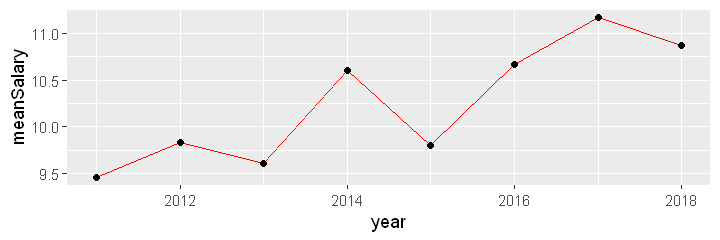

In [22]:
# Create a line plot showing the change in meanSalary over time
# 少了單位"千萬"和美化它
options(repr.plot.width = 6, repr.plot.height = 2)
ggplot(salary, aes(year, meanSalary)) + geom_line(color="red") + geom_point()

In [23]:
# pie chart